# 7장 - 수학을 기계학습에 응용

이 장에서는 여기까지 배운 수학을 인공지능의 일종인 기계학습에 응용합니다.  
기계학습에서 다루는 문제는 크게 회귀와 분류로 나눌 수 있는데 각각의 예를 처음에 하나씩 설명합니다. 그 후, 기계학습의 일종, 뉴럴 네트워크의 개요를 배우고 나서 단일 뉴런에 학습을 시킵니다. 최소한의 구현으로 기계학습을 시행, 수학을 어떻게 기계학습에 활용할 것인지를 조금씩 배웁니다.

## 7.1 회귀와 과학습

비교적 간단한 기계학습인 회귀 분석을 사용해서 데이터의 경향을 학습합니다.

### 회귀와 분류

데이터의 경향을 $Y = f(X)$ 모델(정량적인 룰을 수식 등으로 나타낸 것)로 파악하는 경우를 생각합시다. 이 경우 $X$와 $Y$는 $Y  = \{y_1, y_2, ···, y_m\}, X = \{x_1, x_2, ···, x_n\}$처럼 각각 $m$ 개, $n$ 개의 값으로 이뤄집니다.  
이 때 $Y$의 각 값이 연속값이면 **회귀**, $Y$의 각 값이 0, 1 등의 이산적인 값이면 **분류**라고 합니다. 기계학습에서 다룰 문제는 크게 이 「회귀」와 「분류」로 나눌 수 있습니다.

### 회귀 분석과 다항식 회귀

회귀에 의한 분석을 실시하는 것을 **회귀 분석**이라고 합니다. 회귀 분석은 모델이 데이터의 경향을 학습하기 위한 기계학습의 일종이라고 생각할 수 있습니다. 가장 간단한 회귀 분석은 직선의 식 $y = ax ＋ b$를 데이터에 적용합니다.  
여기에서는 다항식을 데이터에 적용하는 **다항식 회귀**를 사용해서 기계학습을 실시합니다. 이전 장에서 설명했는데 $n$차의 다항식은 다음과 같이 총합의 형태로 나타낼 수 있습니다.

$$ f(x) = \sum_{k=1}^n a_kx^k ··· (식1)$$

이 경우, $a_0, a_1, ···, a_n$이 함수의 파라미터가 됩니다.  
이 식을 데이터에 적용시킴으로써 데이터의 특징을 파악해 미지의 값 예측을 할 수 있습니다.

### 최소제곱법

**최소제곱법**은 다음에 나타내는 제곱합 $J$를 최소로 하는 함수 $f(x)$의 파라미터를 구하는 것입니다.  

$$ J = \sum_{j=1}^m \left( f(x_j) － t_j \right) ^2 $$

여기에서 $t_j$는 각 데이터를 나타냅니다. 이처럼 함수의 출력과 각 데이터의 차를 제곱하고 총합을 취함으로써 제곱합을 구합니다.  
기계학습에서는 이것에 $\frac{1}{2}$을 곱해서 오차로 하는 다음의 오차제곱합이 자주 사용됩니다.  

$$ E = \frac{1}{2} \sum_{j=1}^m \left( f(x_j) － t_j \right) ^2 ··· (식2)$$

$\frac{1}{2}$을 곱하는 것은 미분할 때에 다루기 쉽게 하기 위함입니다.  
이 오차를 최소가 되도록 함수의 파라미터를 조정하는 것은 함수가 데이터의 경향을 나타내도록 학습하는 것을 의미합니다.

### 최급강하법을 이용해서 오차를 최소로 한다

**(식1)** 에 표시된 다항실을 이용한 다항식 회귀의 경우, **(식2)** 의 오차제곱합을 최소로 하도록 각 파라미터를 조정합니다.  
**(식1)** 을 **(식2)** 에 대입하면 다음과 같이 됩니다.  

$$ E = \frac{1}{2} \sum_{j=1}^m \left( \sum_{k=0}^n a_k x_j^k － t_j \right) ^2 ··· (식3)$$

여기에서는 이 오차를 최소화하기 위해서 이전의 장에서 설명한 최급강하법을 사용합니다.  
위 식의 $E$를 최소화하는 경우, 최급강하법은 다음의 식으로 표현됩니다. $0 \leqq i \leqq n$으로 합니다.  

$$ a_i \leftarrow  a_i － \eta \frac{\delta E}{\delta a_i} ···(식4)$$

파라미터 $a_0, a_1, ···, a_n$을 위에 적은 식으로 갱신하는 것인데 그러기 위해서는 오차 $E$의 $a_i$에 의한 편미분 $\frac{\delta E}{\delta a_i}$를 구해야 합니다.  
$\frac{\delta E}{\delta a_i}$는 다음과 같이 연쇄율을 이용해서 구할 수 있습니다.  
먼저 다음과 같이 $u_j$를 설정합니다.  

$$ u_j = \sum_{k=0}^n a_k x_j^k － t_j ···(식5)$$

이 때, $E$는 다음과 같이 나타냅니다.

$$ E = \frac{1}{2} \sum_{j=1}^m u_j^2 $$

따라서 $E$는 $a_i$로 편미분하는데, 연쇄율을 이용해서 다음과 같이 전개할 수 있습니다.  

$$ \frac{\delta E}{\delta a_i} = \frac{1}{2} \sum_{j=1}^m \frac{\delta u_j^2}{\delta u_j} \frac{\delta u_j}{\delta a_i} ···(식6)$$

여기서 $\Sigma$의 내용은 각각 다음과 같이 구할 수 있습니다.

$$ \frac{\delta u_j^2}{\delta u_j} = 2u_j $$
$$ \\ $$
$$ \frac{\delta u_J}{\delta a_i} = x_j^i $$

위에 적은 것은 **(식5)** 의 편미분에 의해 구했습니다.  
이상으로부터 **(식6)** 은 다음의 형태가 됩니다.

$$ \frac{\delta E}{\delta a_i} = \frac{1}{2} \sum_{j=1}^m 2u_jx_j^i $$
$$ \\ $$
$$ = \sum_{j=1}^m u_jx_j^i $$
$$ \\ $$
$$ = \sum_{j=1}^m \left( \sum_{k=0}^n a_kx_j^k － t_j \right) x_j^i $$
$$ \\ $$
$$ = \sum_{j=1}^m \left( f(x_j) － t_j \right) x_j^i  ···(식7)$$

이 식과 **(식4)** 를 사용해서 각 파라미터 $a_i$를 몇 번이나 갱신함으로써 오차제곱합 $E$는 점차 작아집니다.  
이상과 같은 오차 파라미터에 의한 편미분은 **기울기** (경사, 그라디언트, 구배)라고 부릅니다. 특히 최근 주목을 끌고 있는 딥러닝에서는 기울기를 구하는 방법이 알고리즘의 핵심이 됩니다.

### 사용하는 데이터

이 절에서 다항식 회귀에 사용하는 데이터는 **sin()** 함수에 노이즈를 더한 것으로 아래의 코드에서 생성됩니다. NumPy의 **random.randn()** 함수는 인수의 수만큼 정규분포를 따르는 난수를 반환합니다. 여기서는 이것에 0.4를 곱해서 노이즈로 합니다.  
또한, 파라미터를 수혐하기 쉽게 하기 위해서 입력 $X$는 －1에서 1의 범위에 들어가게 합니다.

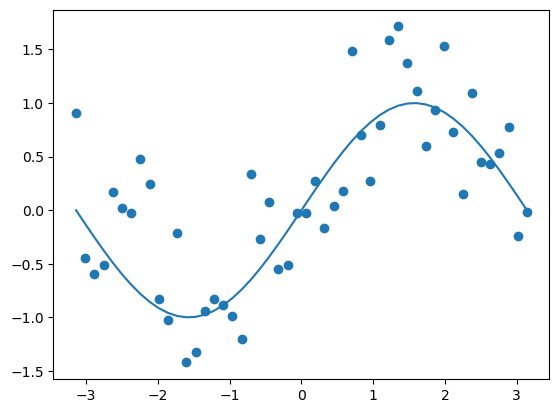

In [3]:
#리스트7.1

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi) # 입력
T = np.sin(X) # 데이터
plt.plot(X, T) # 노이즈의 추가 전

T += 0.4 * np.random.randn(len(X)) # 정규분포를 따른 노이즈를 추가
plt.scatter(X, T) # 노이즈 추가 후

plt.show()

X /= np.pi # 수렴하기 쉽게 X의 범위를 -1부터 1 사이로 수렴한다

**sin()** 함수를 베이스로 하고 있는데 어느 정도 랜덤으로 흩어져 있는 데이터가 생성됐습니다. 이러한 데이터의 경향을 다항식 회귀에 의해 파악합니다.

### 다항식 회귀의 구현

아래의 코드에서 다항식 회귀를 구현합니다. 최급강하법에 의해 오차제곱합이 작아지도록 각 계수를 조정합니다. 각 파라미터에는 초깃값을 설정해야 하는데 입력 $X$의 각 값이 －1과 1사이에 있기 때문에 고차의 항일수록 큰 초깃값이 필요합니다.  
1차, 3차, 6차 각각의 다항식에서 다항식 회귀를 실시, 결과를 표시합니다.

--- 1차 다항식 ---


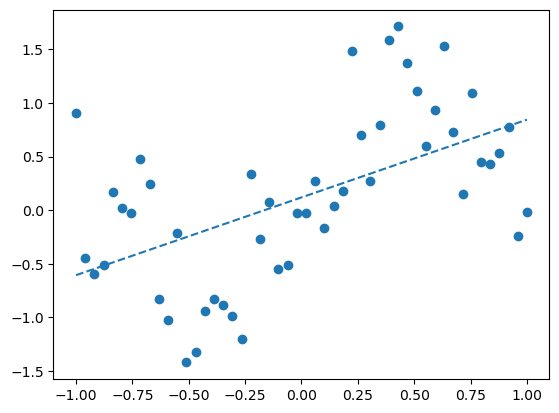

--- 3차 다항식 ---


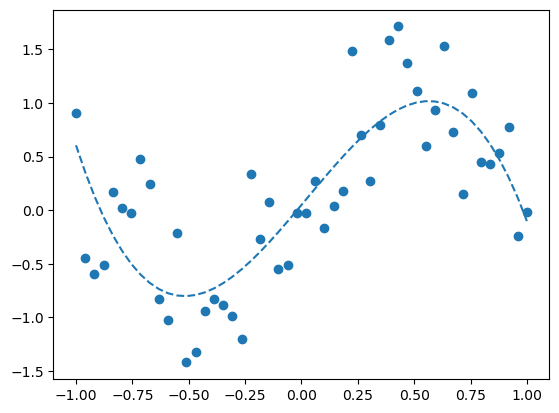

--- 6차 다항식 ---


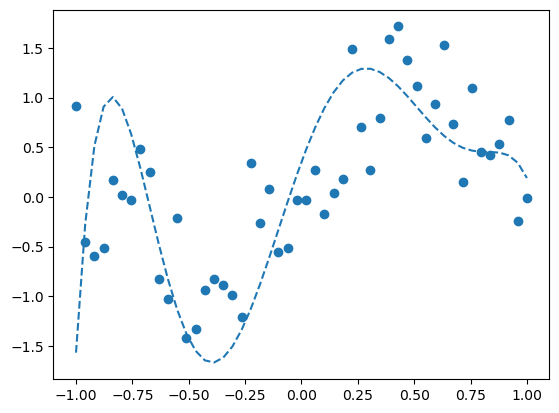

In [8]:
#리스트7.2

eta = 0.01 # 학습계수

# --- 다항식 ---
def polynomial(x, params):
    poly = 0
    for i in range(len(params)):
        poly += params[i]*x**i # (식1)
    return poly

# --- 각 파라미터의 기울기 ---
def grad_params(X, T, params):
    grad_ps = np.zeros(len(params))
    for i in range(len(params)):
        for j in range(len(X)):
            grad_ps[i] += (polynomial(X[j], params) - T[j])*X[j]**i # (식7)
    return grad_ps

# --- 학습 ----
def fit(X, T, degree, epoch):
# degree: 다항식의 차수, spoch: 반복하는 횟수
     
    # --- 파라미터의 초깃값을 설정 ---
    params = np.random.randn(degree+1) # 파라미터의 초깃값
    for i in range(len(params)):
        params[i] *= 2**i
        # 고차의 항일수록 파라미터의 초깃값을 크게 한다
    
    # --- 파라미터의 갱신 ---
    for i in range(epoch):
        params -= eta * grad_params(X, T, params) # (식4)
    
    return params

# --- 결과 표시 ---
degrees = [1, 3, 6] # 다항식의 차수
for degree in degrees:
    print("--- " + str(degree) + "차 다항식 ---")
    # str로 문자열 변환
    params = fit(X, T, degree, 1000)
    Y = polynomial(X, params) # 학습 후의 파라미터를 사용힌 디항식
    plt.scatter(X, T)
    plt.plot(X, Y, linestyle="dashed")
    plt.show()

1차 다항식의 경우 함수의 형상은 직선이 됩니다. 이 경우 데이터의 경향은 매우 대략적으로밖에 파악할 수 없습니다. 3차 다항식의 경우 함수의 형상이 **sin()** 함수와 가까워지고, 데이터 경향을 잘 파악하고 있습니다. 6차 다항식의 경우 함수의 형상이 너무 복잡해서 데이터 경향을 제대로 파악하고 있지 않습니다.  

이상과 같이, 차수가 너무 크거나 작아도 데이터의 경향을 제대로 파악할 수 없습니다. 특히 위에 적은 6차 다항식의 케이스처럼 모델이 너무 복잡한 이유 등으로 데이터에 과잉으로 피팅하는 것을 **과학습** 이라고 합니다. 과학습은 모델이 데이터에 과잉으로 적합한 나머지 데이터의 본질을 훼손한 상태라고 생각할 수 있습니다.  

이러한 과학습이 발생하면 모델의 미지의 데이터를 예측하는 성능이 저하되기 때문에 과학습은 기계학습 전반에서 피해야 할 문제입니다.

## 7.2 분류와 로지스틱 회귀

기계학습의 일종인 로지스틱 회귀에 의한 데이터의 분류를 실시합니다.

### 분류

이전 절에서 조금 접했는데 0, 1 등의 이산적인 값을 출력으로 하는 기계학습의 모델을 사용하여 데이터의 경향을 파악하는 것을 **분류**라고 합니다. 즉, 분류는 기계학습의 모델에 의해 입력을 그룹으로 나누는 걸 의미합니다.  
예를 들어 꽃의 품종 분류나 문자 인식 등 이산적으로 입력을 그룹으로 나누는 기계학습의 태스크는 분류로 간주할 수 있습니다.

### 로지스틱 회귀

로지스틱 회귀에서는 입력을 0이나 1의 2값으로 분류합니다. 로지스틱 회귀에서 분류에 사용하는 식은 다음과 같습니다.

$$ y = \frac{1}{1 ＋ exp \left( －(\sum_{k=1}^n a_k x_k ＋ b) \right)} \ \ ···(식1) $$

$ x_1, x_2, ···, x_n $이 입력, $a_1, a_2, ···, a_n$ 및 $b$는 파라미터입니다. 입력으로서 여러 개의 변수가 있습니다.

$$ u = \sum_{k=1}^n a_k x_k ＋ b $$

로 두면 **(식1)** 은 다음의 형태가 됩니다.  

$$ y = \frac{1}{1 ＋ exp (-u)} $$

이것은 이전 장에서 설명한 시그모이드 함수와 같습니다.  

로지스틱 회귀에서는 0과 1의 사이를 연속적으로 출력하는 시그모이드 함수의 특성을 이용해서 출력이 0.5보다도 작을 때는 0의 그룹으로 분류하고, 출력이 0.5보다 클 때는 1 그룹으로 분류합니다.  

**(식1)** 의 출력은 0부터 1의 범위에 들어가므로 이것은 확률을 나타낸다고 해석할 수 있습니다. 또한, 이진 분류이므로 현실의 그룹은 0이나 1 둘 중 하나로 나타냅니다. 따라서 이전에 설명한 교차 엔트로피를 사용해서 오차를 나타낼 수 있습니다.  

오차를 최소화되게 파라미터를 조정함으로써 **(식1)** 모델은 적절한 분류를 할 수 있도록 학습합니다.

### 파라미터의 최적화

여기에서도 다음 식으로 나타내는 최급강하법을 사용해 파라미터를 최적화합니다. $1 \leqq i \leqq n$로 합니다.

$$ a_i \leftarrow a_i － \eta \frac{\delta E}{\delta a_i}$$
$$ \\ $$
$$ b \leftarrow b － \eta \frac{\delta E}{\delta b} ··· (식2)$$

먼저 오차인데, 다음의 교차 엔트로피를 사용합니다.

$$ E = －\sum_{j=1}^m \left( t_j \log y_j ＋ (1 － t_j) \log (1 － y_j ) \right)  ··· (식3)$$

여기에서 $m$은 학습에 사용하는 갬플의 수입니다. 또한, $y_j$는 다음과 같이 나타냅니다.

$$ y_j = \frac{1}{1 ＋ exp \left( － (\sum_{k=1}^n a_k x_{jk} ＋ b) \right)}  ··· (식4) $$

$x_{jk}$에는 첨자 2개가 있는데 이 $j$는 출력 $y_j$와 대응한 입력인 것을 나타냅니다.  
여기에서 연쇄율을 사용해서 오차 $E$를 $a_i$로 편미분하고 기울기를 구합니다.

$$ \frac{\delta E}{\delta a_i} = －\sum_{j=1}^m \left( t_j \frac{\delta}{\delta a_i}(\log y_j) ＋ (1 － t_j) \frac{\delta}{\delta a_i}(\log (1 － y_j)) \right) $$
$$ \\ $$
$$ = － \sum_{j=1}^m \left( t_j \frac{\delta (\log y_j)}{\delta y_j} \frac{\delta y_j}{\delta a_i} ＋ (1 － t_j) \frac{\delta ( \log (1 － y_j))}{\delta y_j} \frac{\delta y_j}{\delta a_i} \right)  ··· (식5)$$
$$ \\ $$
$$ = －\sum_{j=1}^m \left( \frac{t_j}{y_j} \frac{\delta y_j}{\delta a_i} － \frac{1 － t_j}{1 － y_j} \frac{\delta y_j}{\delta a_i} \right) $$

여기에서 $\frac{\delta y_j}{\delta a_i}$를 구합니다. 이것은 $ u_j = \sum_{k=1}^n a_k x_{jk} ＋ b$로 두면 연쇄율에 의해 다음과 같이 나타낼 수 있습니다.

$$ \frac{\delta y_j}{\delta a_i} = \frac{\delta y_j}{\delta u_j} \frac{\delta u_j}{\delta a_i} ··· (식6)$$

여기에서 **(식6)** 의 우변의 $\frac{\delta y_j}{\delta u_j}$는 시그모이드 함수의 편미분이 됩니다. 시그모이드 함수 $f(x)$의 도함수는

$$ f'(x) = (1 － f(x))f(x) $$

이므로 다음과 같이 나타낼 수 있습니다.

$$ \frac{\delta y_j}{\delta u_j} = (1－y_j)y_j $$

또한, **(식6)** 의 우변의 $\frac{\delta u_j}{\delta a_i}$는 다음과 같이 구할 수 있습니다.

$$ \frac{\delta u_j}{\delta a_i} = x_{ji} $$

이것들에 의해 **(식6)** 은 다음과 같이 나타냅니다.

$$ \frac{\delta y_j}{\delta a_i} = (1 － y_j) y_j x_{ji} $$

이것을 **(식5)** 에 대입하면 다음과 같이 됩니다.  

$$ \frac{\delta E}{\delta a_i} = － \sum_{j=1}^m \left( \frac{t_j}{y_j} \frac{\delta y_j}{\delta a_i} － \frac{1 － t_j}{1 － y_j} \frac{\delta y_j}{\delta a_i} \right) $$
$$ \\ $$
$$ = － \sum_{j=1}^m \left( t_j (1 － y_j) x_{ji} － (1 － t_j) y_j x_{ji} \right) $$
$$ \\ $$
$$ = － \sum_{j=1}^m (t_j － y_j)x_{ji}$$
$$ \\ $$
$$ = \sum_{j=1}^m (y_j － t_j) x_{ji} ··· (식7)$$

결과로서 이전 절의 회귀의 경우와 비슷한 식을 얻을 수 있었습니다.  
다음으로 $\frac{\delta E}{\delta b}$를 구합니다. 이 기울기를 구하는 방법은 $\frac{\delta E}{\delta a_i}$의 구하는 방법과 거의 비슷한데 $\frac{\delta u_j}{\delta b}$만 다릅니다.

$$ \frac{\delta u_j}{\delta b} = 1 $$

**(식5)** 의 $a_i$를 $b$로 바꾸고, 위에 적은 관계를 사용함으로써 $\frac{\delta E}{\delta b}$를 다음과 같이 구할 수 있습니다.

$$ \frac{\delta E}{\delta b} = \sum_{j=1}^m (y_j － t_j) ··· (식8) $$

**(식2)** **(식7)** **(식8)** 에 의해 파라미터를 반복 갱신해서 최적화합니다.

### 사용하는 데이터

이 절에서 로지스틱 회귀에 사용하는 데이터는 $(x, y)$ 좌표에 정답 라벨로서 0이나 1을 할당한 것으로 아래의 코드로 생성합니다. 좌표 평면에서 왼쪽 위 영역의 정답 라벨을 0, 오른쪽 아래 영역의 정답 라벨을 1로 했는데 영역의 경계는 일부러 불명료하게 합니다.

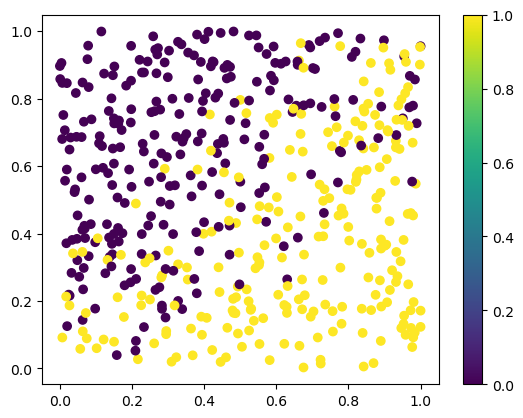

In [3]:
#리스트7.3

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_data = 500 # 데이터 수
X = np.zeros((n_data, 2)) # 입력
T = np.zeros((n_data)) # 정답

for i in range(n_data):
    # x, y 좌표를 랜덤으로 설정한다
    x_rand = np.random.rand() # x 좌표
    y_rand = np.random.rand() # y 좌표
    X[i, 0] = x_rand
    X[i, 1] = y_rand
    
    
    # x가 y보다 큰 영역에서는 정답 라벨을 1로 한다.
    # 경계는 정규분포를 사용해서 조금 불명료하게
    if x_rand > y_rand + 0.2*np.random.randn():
        T[i] = 1

plt.scatter(X[:, 0], X[:, 1], c=T) # 정답 라벨을 색으로 나타낸다
plt.colorbar()
plt.show()

데이터는 정답 라벨에 의해 0과 1의 그룹으로 나뉘어 있습니다. 위 코드의 산포도에는 명확하게 어딘가의 그룹에 속하는 영역과 라벨이 뒤섞인 영역이 있습니다.